### Importing Libraries

In [121]:
import matplotlib as plt
import matplotlib.pyplot as pyplot
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.mixture import GaussianMixture
from sklearn.metrics import accuracy_score as accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from scipy.io import arff
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import AffinityPropagation, Birch, MeanShift, KMeans, AgglomerativeClustering, DBSCAN
from sklearn.datasets import make_blobs, make_classification, make_circles

### Processing Data

In [81]:
min_max_scaler = preprocessing.MinMaxScaler()

# parsing the data and getting the 0th index 
ionosphere_data = pd.DataFrame(arff.loadarff('data/ionosphere_data.arff')[0])
ionosphere_data_x = ionosphere_data.iloc[:,:-1]
ionosphere_data_y = ionosphere_data.iloc[:,-1]

bank_notes_data = pd.DataFrame(arff.loadarff('data/bank_notes_data.arff')[0])
bank_notes_data_x = bank_notes_data.iloc[:,:-1]
bank_notes_data_y = bank_notes_data.iloc[:,-1]

steel_plates_data = pd.DataFrame(arff.loadarff('data/steel_plates_data.arff')[0])
steel_plates_data_x = steel_plates_data.iloc[:,:-1]
steel_plates_data_y = steel_plates_data.iloc[:,-1]

graph_list1 = []
data_x = []
resres = []
knn_mean_err, GNB_mean_err, DT_mean_err, logreg_mean_err, GB_mean_err, RF_mean_err, MLP_mean_err = [], [], [],[],[],[],[]



## PART 1

### KNN

In [82]:
def knn(xdata, ydata):
    le = LabelEncoder()
    encodedY = le.fit_transform(ydata)
    res = []
    lowesterrs = []
    meanerr = 0
    for k in range(1,6):
        scores = []
        test_errs = []
        lowest = 1000
        for i in range(1,51):
            x_train, x_test, y_train, y_test = train_test_split(xdata, encodedY, test_size = 0.5, random_state = 42 + i)
            ypred = KNeighborsClassifier(n_neighbors = k).fit(x_train, y_train).predict(x_test)
            acc = accuracy_score(y_test, ypred)
            test_error = 1.0 - acc
            test_errs.append(test_error)
            scores.append(acc)
        res.append(scores)
        for err in test_errs:
            if (err < lowest):
                lowest = err
        lowesterrs.append(lowest)
    pyplot.boxplot(res)
    resres.append(res)
    graph_list1.append(pyplot.gcf()) 
    pyplot.ylabel('Accuracy')
    pyplot.show
    for err in lowesterrs:
        meanerr += err
    meanerr = meanerr/len(lowesterrs)
    print(meanerr) 
    print(lowesterrs)
    knn_mean_err.append(meanerr)

0.09886363636363638
[0.08522727272727271, 0.06818181818181823, 0.11363636363636365, 0.10227272727272729, 0.125]


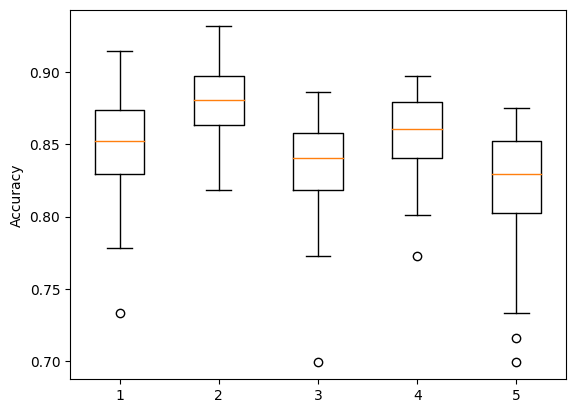

In [83]:
knn(ionosphere_data_x, ionosphere_data_y)

0.3522142121524202
[0.37281153450051496, 0.34809474768280124, 0.3573635427394438, 0.33676622039134907, 0.34603501544799176]


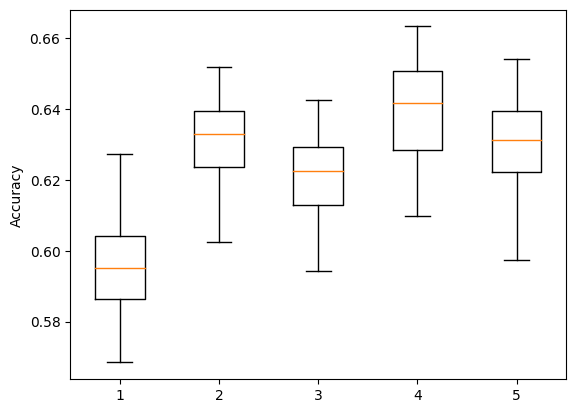

In [84]:
knn(steel_plates_data_x, steel_plates_data_y)

0.0
[0.0, 0.0, 0.0, 0.0, 0.0]


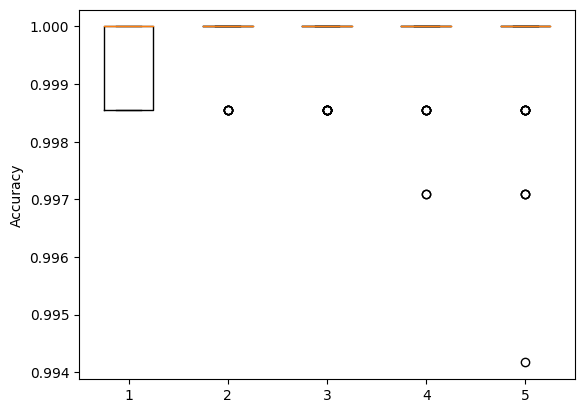

In [85]:
knn(bank_notes_data_x, bank_notes_data_y)

### GaussianNB

In [86]:
def gnb(xdata, ydata):
    gnbHyperparameters = [1.9 * (10**-9), 1.9 * (10**-5), 1.9 * (10**-1)]
    le = LabelEncoder()
    encodedY = le.fit_transform(ydata)
    res = []
    lowesterrs = []
    meanerr = 0
    for k in gnbHyperparameters:
        scores = []
        test_errs = []
        lowest = 1000
        for i in range(1,51):
            x_train, x_test, y_train, y_test = train_test_split(xdata, encodedY, test_size = 0.5, random_state = 42 + i)
            ypred = GaussianNB(var_smoothing = k).fit(x_train, y_train).predict(x_test)
            acc = accuracy_score(y_test, ypred)
            test_error = 1.0 - acc
            test_errs.append(test_error)
            scores.append(acc)
        res.append(scores)
        for err in test_errs:
            if (err < lowest):
                lowest = err
        lowesterrs.append(lowest)
    pyplot.boxplot(res)
    resres.append(res)
    graph_list1.append(pyplot.gcf()) 
    pyplot.ylabel('Accuracy')
    pyplot.show
    for err in lowesterrs:
        meanerr += err
    meanerr = meanerr/len(lowesterrs)
    print(meanerr) 
    print(lowesterrs)
    GNB_mean_err.append(meanerr)

0.06628787878787878
[0.07386363636363635, 0.051136363636363646, 0.07386363636363635]


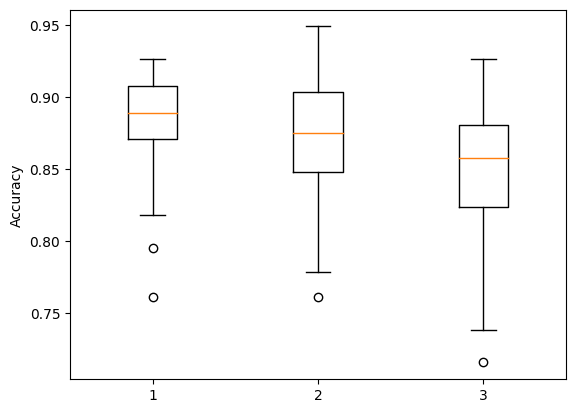

In [87]:
gnb(ionosphere_data_x, ionosphere_data_y)

0.39100583590799864
[0.470648815653965, 0.37796086508753857, 0.32440782698249226]


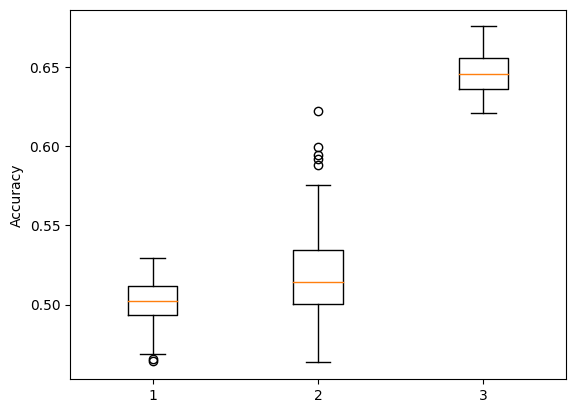

In [88]:
gnb(steel_plates_data_x, steel_plates_data_y)

0.14237123420796893
[0.13265306122448983, 0.13265306122448983, 0.16180758017492713]


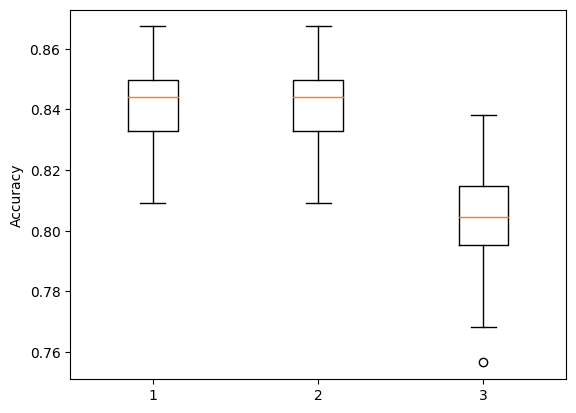

In [89]:
gnb(bank_notes_data_x, bank_notes_data_y)

### Decision Tree Classifier

In [90]:
def dt(xdata, ydata):
    dtHyperparameters = [1, 3, 5, 8, 10]
    le = LabelEncoder()
    encodedY = le.fit_transform(ydata)
    res = []
    lowesterrs = []
    meanerr = 0
    for k in dtHyperparameters:
        scores = []
        test_errs = []
        lowest = 1000
        for i in range(1,51):
            x_train, x_test, y_train, y_test = train_test_split(xdata, encodedY, test_size = 0.5, random_state = 42 + i)
            ypred = DecisionTreeClassifier(max_depth = k).fit(x_train, y_train).predict(x_test)
            acc = accuracy_score(y_test, ypred)
            test_error = 1.0 - acc
            test_errs.append(test_error)
            scores.append(acc)
        res.append(scores)
        for err in test_errs:
            if (err < lowest):
                lowest = err
        lowesterrs.append(lowest)
    pyplot.boxplot(res)
    resres.append(res)
    graph_list1.append(pyplot.gcf()) 
    pyplot.ylabel('Accuracy')
    pyplot.show
    for err in lowesterrs:
        meanerr += err
    meanerr = meanerr/len(lowesterrs)
    print(meanerr) 
    print(lowesterrs)
    DT_mean_err.append(meanerr)

0.08636363636363638
[0.13068181818181823, 0.07954545454545459, 0.07386363636363635, 0.07386363636363635, 0.07386363636363635]


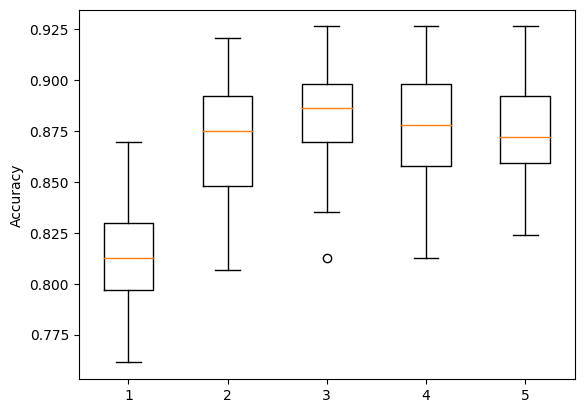

In [91]:
dt(ionosphere_data_x, ionosphere_data_y)

0.09433573635427397
[0.31616889804325443, 0.13182286302780644, 0.023686920700308978, 0.0, 0.0]


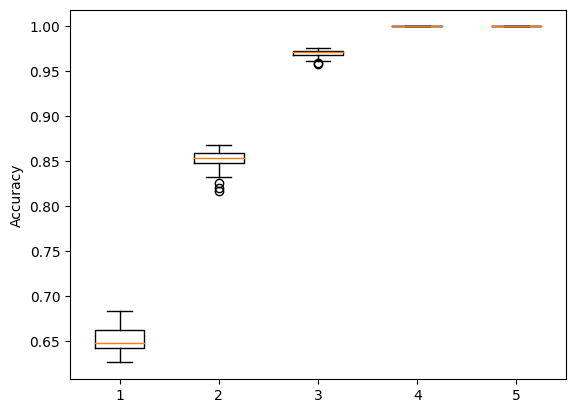

In [92]:
dt(steel_plates_data_x, steel_plates_data_y)

0.04110787172011661
[0.13265306122448983, 0.04810495626822153, 0.010204081632653073, 0.005830903790087438, 0.008746355685131157]


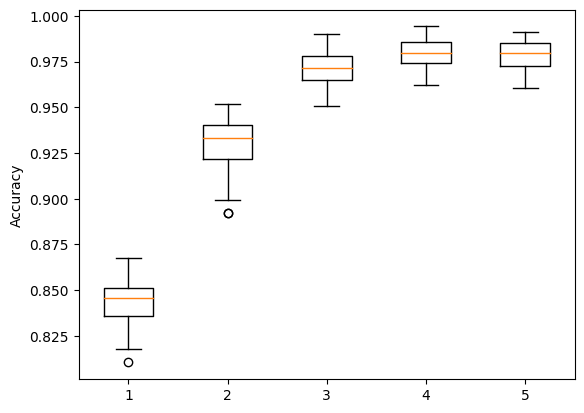

In [93]:
dt(bank_notes_data_x, bank_notes_data_y)

### Logistic Regression

In [94]:
def logreg(xdata, ydata):
    logregHyperparameters = [0.1, 0.5, 1, 2, 5]
    le = LabelEncoder()
    encodedY = le.fit_transform(ydata)
    res = []
    lowesterrs = []
    meanerr = 0
    for k in logregHyperparameters:
        scores = []
        test_errs = []
        lowest = 1000
        for i in range(1,51):
            x_train, x_test, y_train, y_test = train_test_split(xdata, encodedY, test_size = 0.5, random_state = 42 + i)
            ypred = LogisticRegression(C = k).fit(x_train, y_train).predict(x_test)
            acc = accuracy_score(y_test, ypred)
            test_error = 1.0 - acc
            test_errs.append(test_error)
            scores.append(acc)
        res.append(scores)
        for err in test_errs:
            if (err < lowest):
                lowest = err
        lowesterrs.append(lowest)
    pyplot.boxplot(res)
    resres.append(res)
    graph_list1.append(pyplot.gcf()) 
    pyplot.ylabel('Accuracy')
    pyplot.show
    for err in lowesterrs:
        meanerr += err
    meanerr = meanerr/len(lowesterrs)
    print(meanerr) 
    print(lowesterrs)
    logreg_mean_err.append(meanerr)

0.09090909090909091
[0.10227272727272729, 0.09090909090909094, 0.09659090909090906, 0.07954545454545459, 0.08522727272727271]


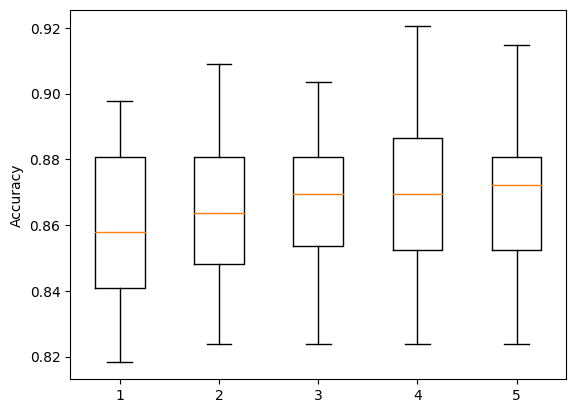

In [95]:
logreg(ionosphere_data_x, ionosphere_data_y)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sciki

0.28980432543769313
[0.2914521112255407, 0.2914521112255407, 0.2883625128733265, 0.2883625128733265, 0.2893923789907312]


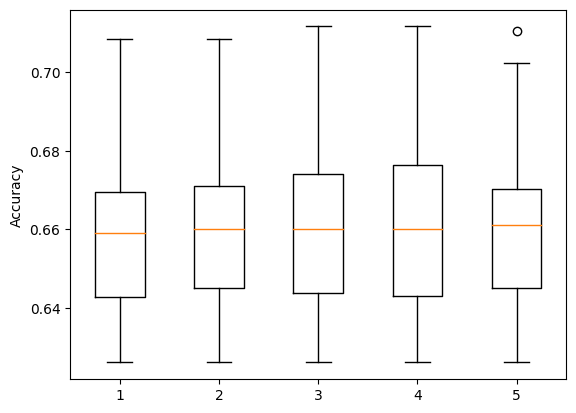

In [96]:
logreg(steel_plates_data_x, steel_plates_data_y)

0.005247813411078717
[0.010204081632653073, 0.002915451895043719, 0.004373177842565634, 0.005830903790087438, 0.002915451895043719]


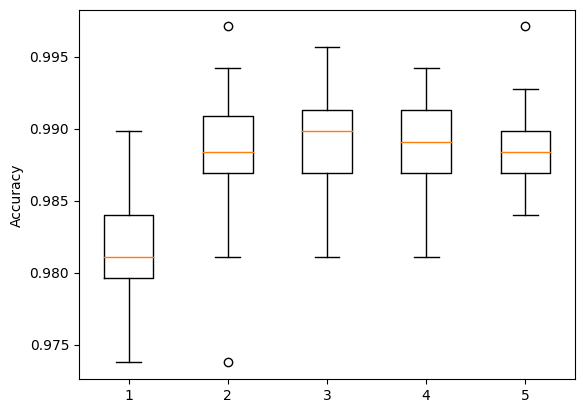

In [97]:
logreg(bank_notes_data_x, bank_notes_data_y)

### Gradient Boosting Classifier

In [98]:
def gradBoost(xdata, ydata):
    gradBoostHyperparameters = [1, 3, 5, 8, 10]
    le = LabelEncoder()
    encodedY = le.fit_transform(ydata)
    res = []
    lowesterrs = []
    meanerr = 0
    for k in gradBoostHyperparameters:
        scores = []
        test_errs = []
        lowest = 1000
        for i in range(1,51):
            x_train, x_test, y_train, y_test = train_test_split(xdata, encodedY, test_size = 0.5, random_state = 42 + i)
            ypred = GradientBoostingClassifier(max_depth = k).fit(x_train, y_train).predict(x_test)
            acc = accuracy_score(y_test, ypred)
            test_error = 1.0 - acc
            test_errs.append(test_error)
            scores.append(acc)
        res.append(scores)
        for err in test_errs:
            if (err < lowest):
                lowest = err
        lowesterrs.append(lowest)
    pyplot.boxplot(res)
    resres.append(res)
    graph_list1.append(pyplot.gcf()) 
    pyplot.ylabel('Accuracy')
    pyplot.show
    for err in lowesterrs:
        meanerr += err
    meanerr = meanerr/len(lowesterrs)
    print(meanerr) 
    print(lowesterrs)
    GB_mean_err.append(meanerr)

0.04886363636363635
[0.045454545454545414, 0.045454545454545414, 0.051136363636363646, 0.051136363636363646, 0.051136363636363646]


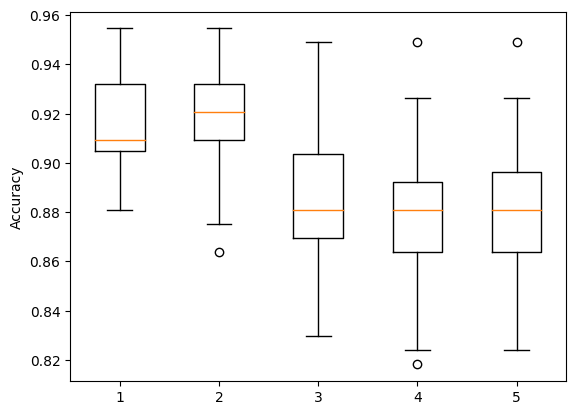

In [99]:
gradBoost(ionosphere_data_x, ionosphere_data_y)

0.0
[0.0, 0.0, 0.0, 0.0, 0.0]


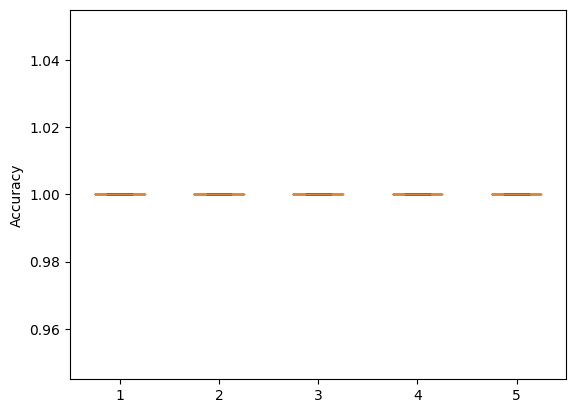

In [100]:
gradBoost(steel_plates_data_x, steel_plates_data_y)

0.005830903790087461
[0.011661807580174877, 0.001457725947521915, 0.002915451895043719, 0.005830903790087438, 0.007288629737609353]


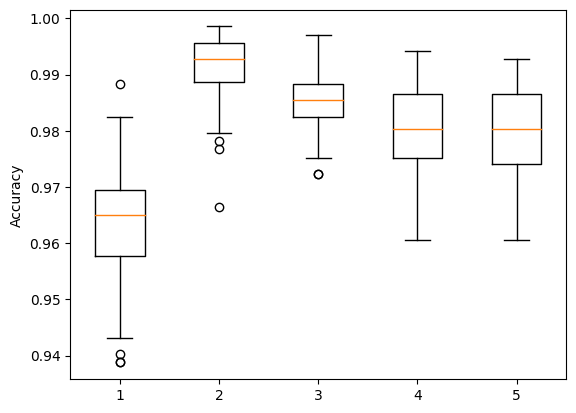

In [101]:
gradBoost(bank_notes_data_x, bank_notes_data_y)

### Random Forrest Classifier

In [102]:
def ranFor(xdata, ydata):
    ranForHyperparameters = [1, 3, 5, 8, 10]
    le = LabelEncoder()
    encodedY = le.fit_transform(ydata)
    res = []
    lowesterrs = []
    meanerr = 0
    for k in ranForHyperparameters:
        scores = []
        test_errs = []
        lowest = 1000
        for i in range(1,51):
            x_train, x_test, y_train, y_test = train_test_split(xdata, encodedY, test_size = 0.5, random_state = 42 + i)
            ypred = RandomForestClassifier(max_depth = k).fit(x_train, y_train).predict(x_test)
            acc = accuracy_score(y_test, ypred)
            test_error = 1.0 - acc
            test_errs.append(test_error)
            scores.append(acc)
        res.append(scores)
        for err in test_errs:
            if (err < lowest):
                lowest = err
        lowesterrs.append(lowest)
    pyplot.boxplot(res)
    resres.append(res)
    graph_list1.append(pyplot.gcf()) 
    pyplot.ylabel('Accuracy')
    pyplot.show
    for err in lowesterrs:
        meanerr += err
    meanerr = meanerr/len(lowesterrs)
    print(meanerr) 
    print(lowesterrs)
    RF_mean_err.append(meanerr)

0.05340909090909089
[0.09090909090909094, 0.045454545454545414, 0.045454545454545414, 0.051136363636363646, 0.03409090909090906]


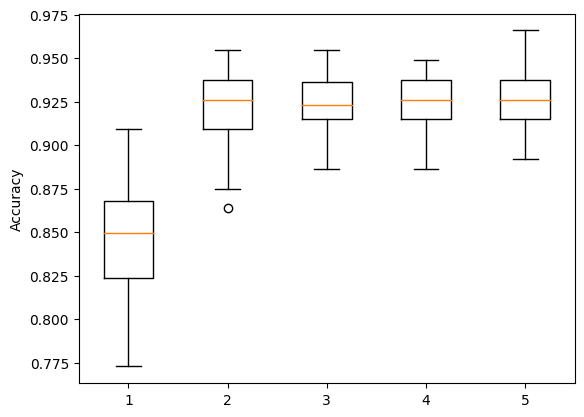

In [103]:
ranFor(ionosphere_data_x, ionosphere_data_y)

0.08609680741503607
[0.31616889804325443, 0.08547888774459322, 0.015447991761071034, 0.009268795056642687, 0.004119464469618972]


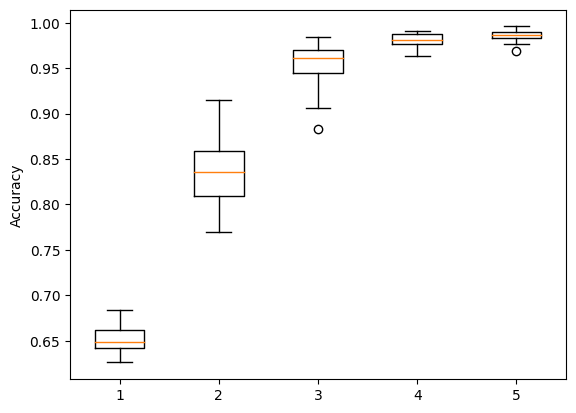

In [104]:
ranFor(steel_plates_data_x, steel_plates_data_y)

0.025655976676384862
[0.09475218658892126, 0.026239067055393583, 0.004373177842565634, 0.001457725947521915, 0.001457725947521915]


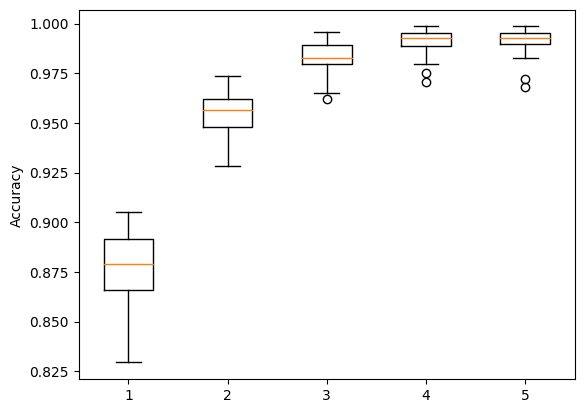

In [105]:
ranFor(bank_notes_data_x, bank_notes_data_y)

### MLP Classifier

In [106]:
def mlp(xdata, ydata):
    mlpHyperparameters = [1e-5, 1e-3, 0.1, 10]
    le = LabelEncoder()
    encodedY = le.fit_transform(ydata)
    res = []
    lowesterrs = []
    meanerr = 0
    for k in mlpHyperparameters:
        scores = []
        test_errs = []
        lowest = 1000
        for i in range(1,51):
            x_train, x_test, y_train, y_test = train_test_split(xdata, encodedY, test_size = 0.5, random_state = 42 + i)
            ypred = MLPClassifier(alpha = k).fit(x_train, y_train).predict(x_test)
            acc = accuracy_score(y_test, ypred)
            test_error = 1.0 - acc
            test_errs.append(test_error)
            scores.append(acc)
        res.append(scores)
        for err in test_errs:
            if (err < lowest):
                lowest = err
        lowesterrs.append(lowest)
    pyplot.boxplot(res)
    resres.append(res)
    graph_list1.append(pyplot.gcf()) 
    pyplot.ylabel('Accuracy')
    pyplot.show
    for err in lowesterrs:
        meanerr += err
    meanerr = meanerr/len(lowesterrs)
    print(meanerr) 
    print(lowesterrs)
    MLP_mean_err.append(meanerr)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iteration

0.056818181818181795
[0.045454545454545414, 0.045454545454545414, 0.03409090909090906, 0.10227272727272729]


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


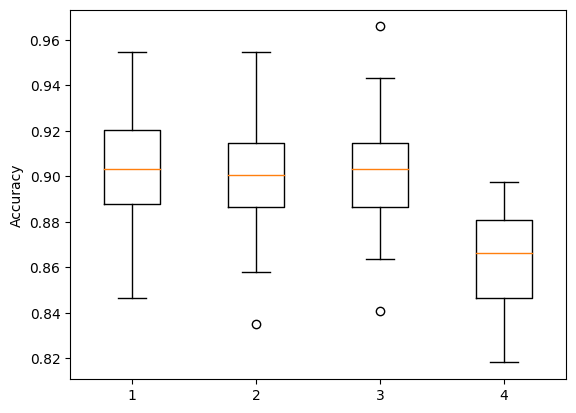

In [107]:
mlp(ionosphere_data_x, ionosphere_data_y)

0.318486096807415
[0.3223480947476828, 0.32131822863027804, 0.31719876416065906, 0.3130792996910402]


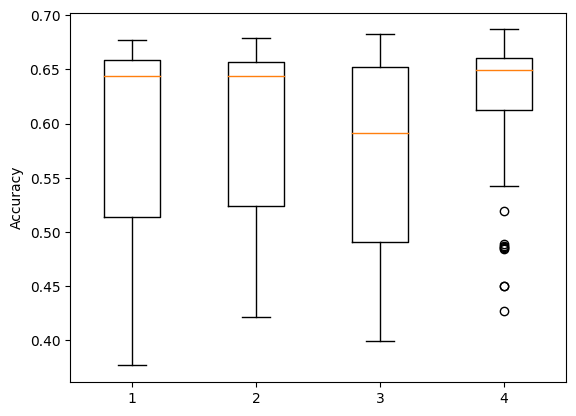

In [108]:
mlp(steel_plates_data_x, steel_plates_data_y)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iteration

0.002551020408163268
[0.0, 0.0, 0.0, 0.010204081632653073]


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


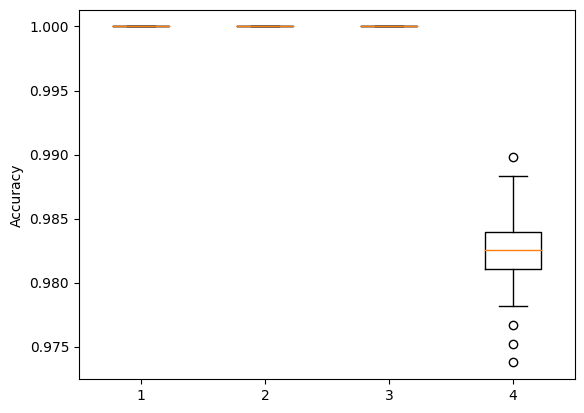

In [109]:
mlp(bank_notes_data_x, bank_notes_data_y)

## PART 2

### Making Datasets

In [110]:
randomseed = 42

x1, y1 = make_blobs(n_samples = 1000, n_features = 2, random_state = randomseed)
x2, y2 = make_classification(n_samples = 1000, n_features = 2, n_informative = 2, n_clusters_per_class = 1, n_redundant = 0, random_state = randomseed)
x3, y3 = make_circles(n_samples = 1000, noise = 0.3, random_state = randomseed)

graph_list = []
x_list = [x1, x2, x3]
y_list = []
def plot_clusters(x, y, title):
    pyplot.scatter(x[:, 0], x[:, 1], c = y, s = 30, cmap = plt.cm.Paired)
    pyplot.title(title)
    graph_list.append(pyplot.gcf()) 
    pyplot.show()


### K-Means 

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


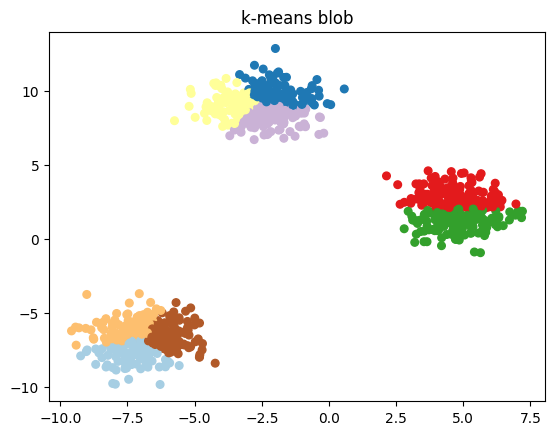

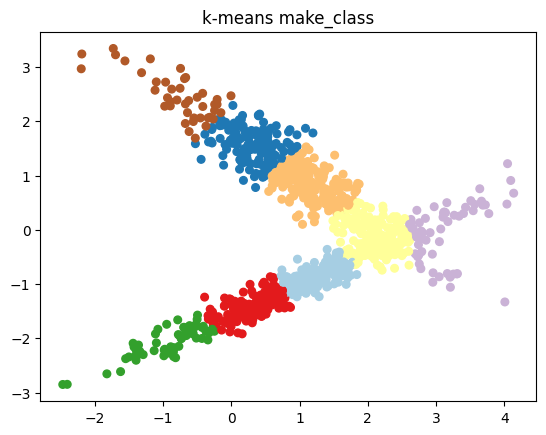

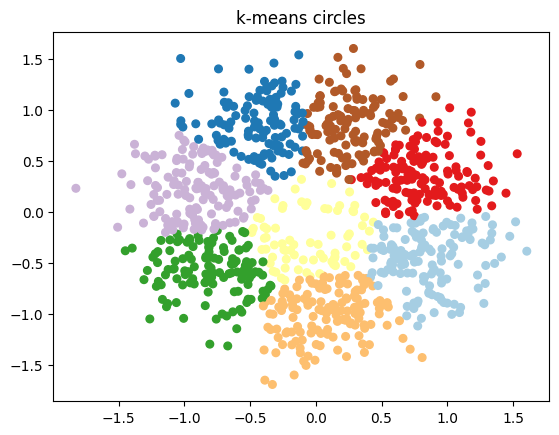

In [111]:
kmeans = KMeans(random_state=randomseed)
y1_kmeans = kmeans.fit_predict(x1)
y2_kmeans = kmeans.fit_predict(x2)
y3_kmeans = kmeans.fit_predict(x3)

y_list += [y1_kmeans, y2_kmeans, y3_kmeans]

plot_clusters(x1, y1_kmeans, 'k-means blob')
plot_clusters(x2, y2_kmeans, 'k-means make_class')
plot_clusters(x3, y3_kmeans, 'k-means circles')

### Affinity Propagation

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_affinity_propagation.py:143: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(


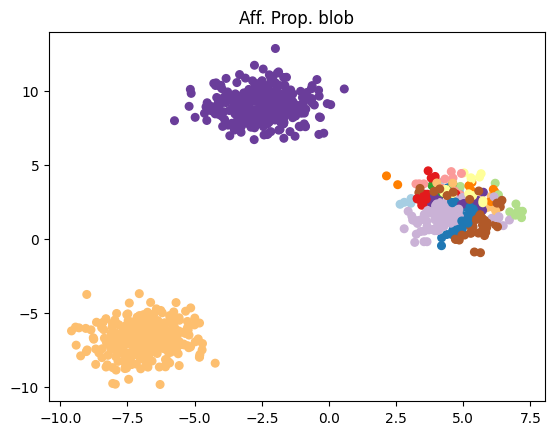

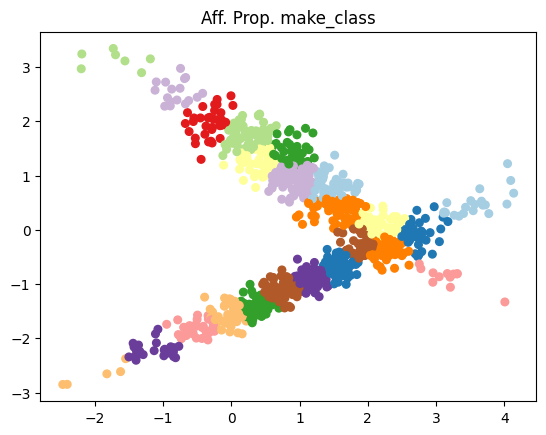

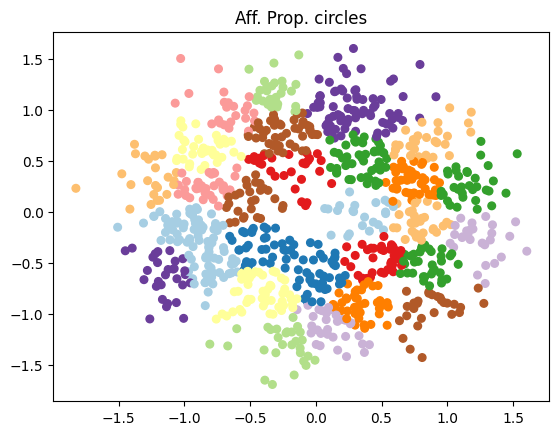

In [112]:
aprop = AffinityPropagation(random_state = randomseed)
y1_aprop = aprop.fit_predict(x1)
y2_aprop = aprop.fit_predict(x2)
y3_aprop = aprop.fit_predict(x3)

y_list += [y1_aprop, y2_aprop, y3_aprop]

plot_clusters(x1, y1_aprop, 'Aff. Prop. blob')
plot_clusters(x2, y2_aprop, 'Aff. Prop. make_class')
plot_clusters(x3, y3_aprop, 'Aff. Prop. circles')

### DBSCAN

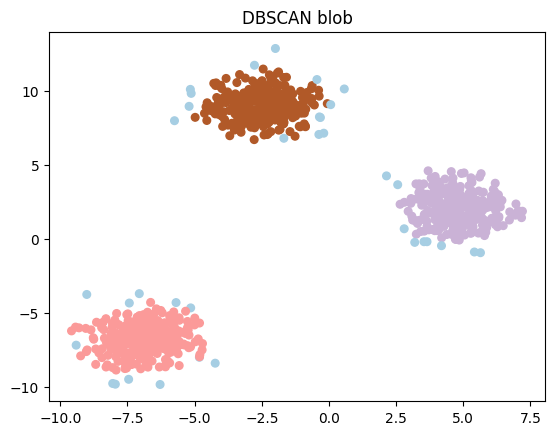

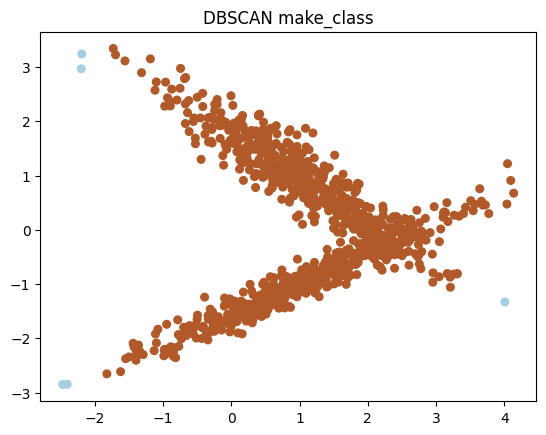

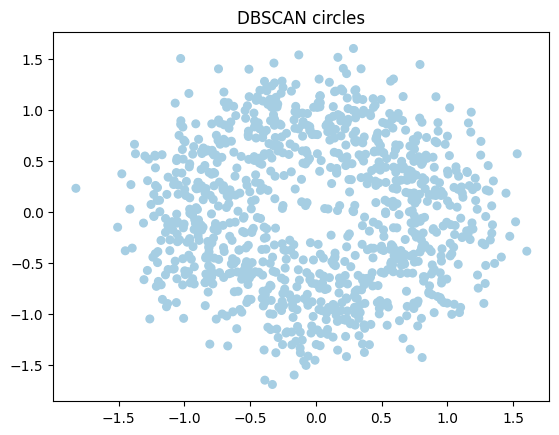

In [113]:
DBscan = DBSCAN()
y1_db = DBscan.fit_predict(x1)
y2_db = DBscan.fit_predict(x2)
y3_db = DBscan.fit_predict(x3)

y_list += [y1_db, y2_db, y3_db]

plot_clusters(x1, y1_db, 'DBSCAN blob')
plot_clusters(x2, y2_db, 'DBSCAN make_class')
plot_clusters(x3, y3_db, 'DBSCAN circles')

### Gaussian Mixture Model

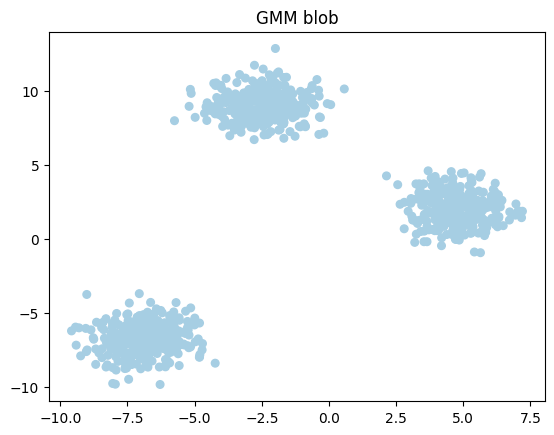

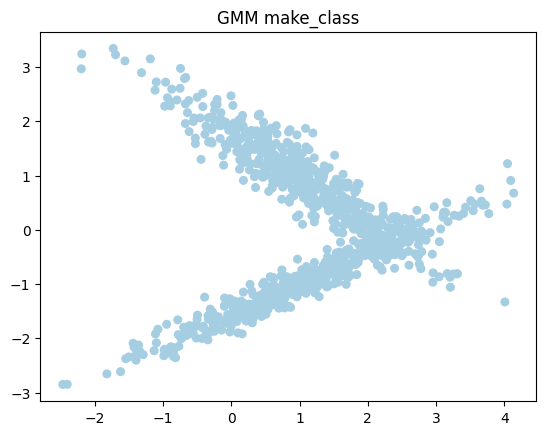

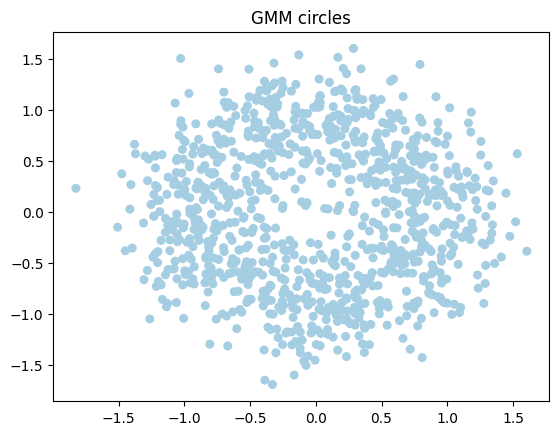

In [114]:
GaussianMixture = GaussianMixture(random_state = randomseed)
y1_gm = GaussianMixture.fit_predict(x1)
y2_gm = GaussianMixture.fit_predict(x2)
y3_gm = GaussianMixture.fit_predict(x3)

y_list += [y1_gm, y2_gm, y3_gm]

plot_clusters(x1, y1_gm, 'GMM blob')
plot_clusters(x2, y2_gm, 'GMM make_class')
plot_clusters(x3, y3_gm, 'GMM circles')

### BIRCH

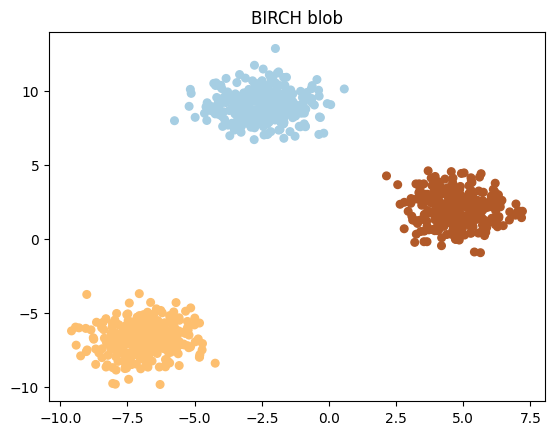

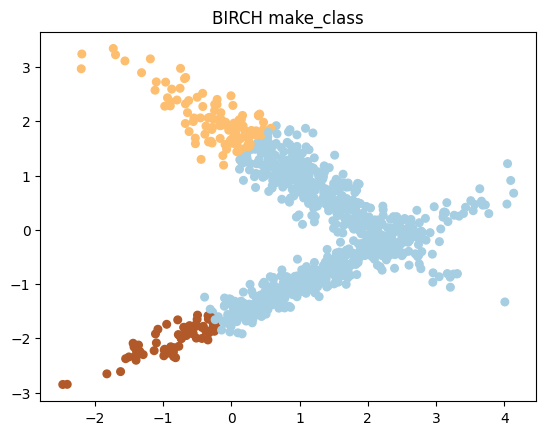

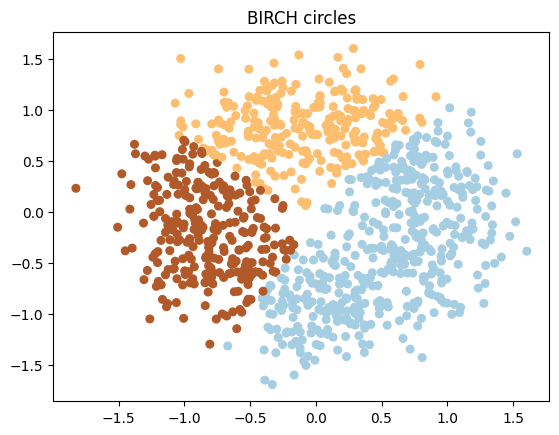

In [115]:
birch = Birch()
y1_b = birch.fit_predict(x1)
y2_b = birch.fit_predict(x2)
y3_b = birch.fit_predict(x3)

y_list += [y1_b, y2_b, y3_b]

plot_clusters(x1, y1_b, 'BIRCH blob')
plot_clusters(x2, y2_b, 'BIRCH make_class')
plot_clusters(x3, y3_b, 'BIRCH circles')

### Agglomerative Clustering

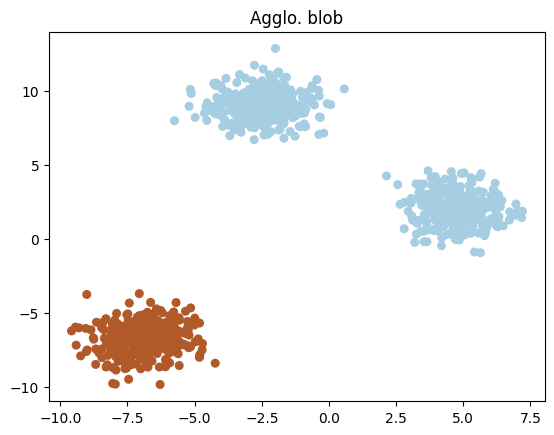

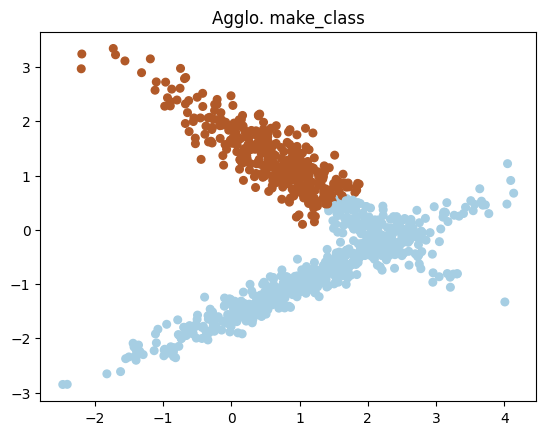

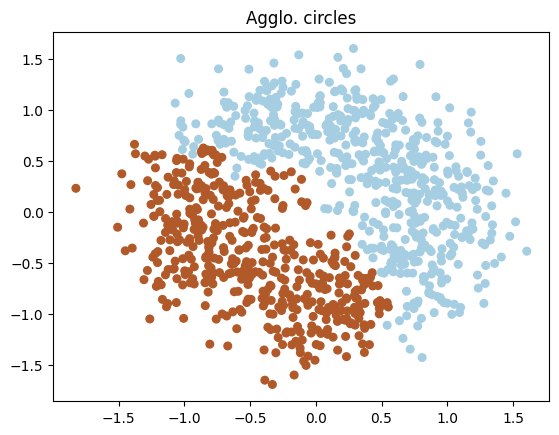

In [116]:
agg = AgglomerativeClustering()
y1_agg = agg.fit_predict(x1)
y2_agg = agg.fit_predict(x2)
y3_agg = agg.fit_predict(x3)

y_list += [y1_agg, y2_agg, y3_agg]

plot_clusters(x1, y1_agg, 'Agglo. blob')
plot_clusters(x2, y2_agg, 'Agglo. make_class')
plot_clusters(x3, y3_agg, 'Agglo. circles')

### Mean Shift

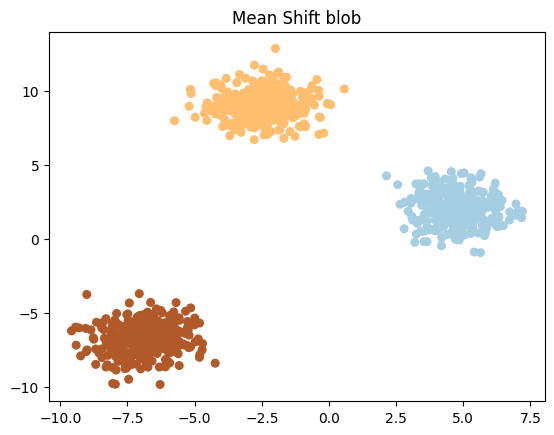

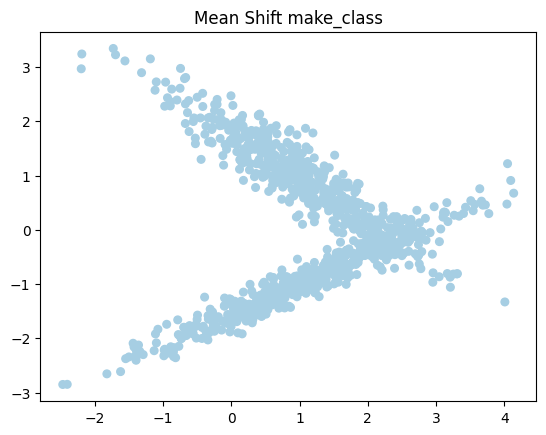

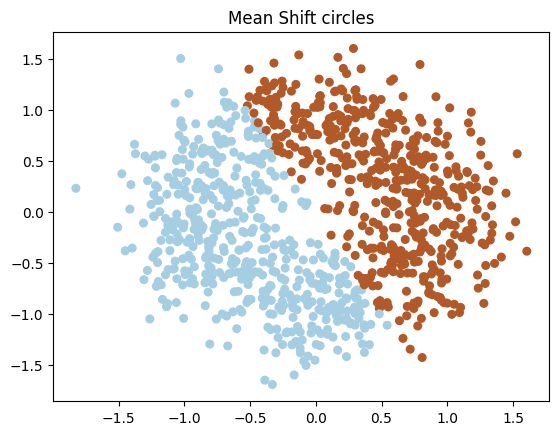

In [117]:
ms = MeanShift()
y1_ms = ms.fit_predict(x1)
y2_ms = ms.fit_predict(x2)
y3_ms = ms.fit_predict(x3)

y_list += [y1_ms, y2_ms, y3_ms]

plot_clusters(x1, y1_ms, 'Mean Shift blob')
plot_clusters(x2, y2_ms, 'Mean Shift make_class')
plot_clusters(x3, y3_ms, 'Mean Shift circles')

## Plotting All The Data

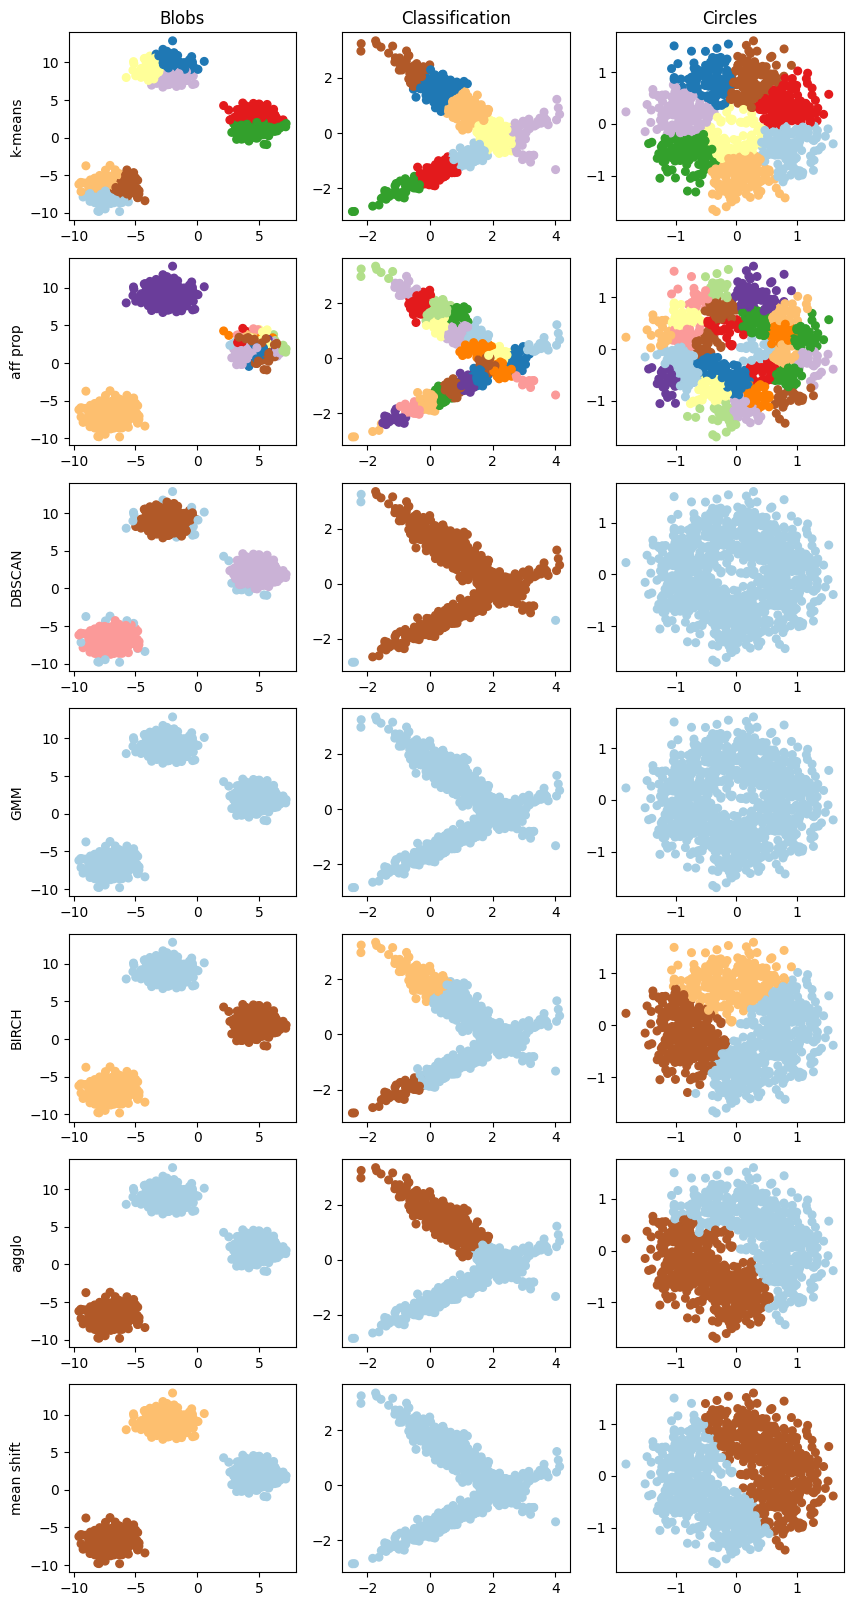

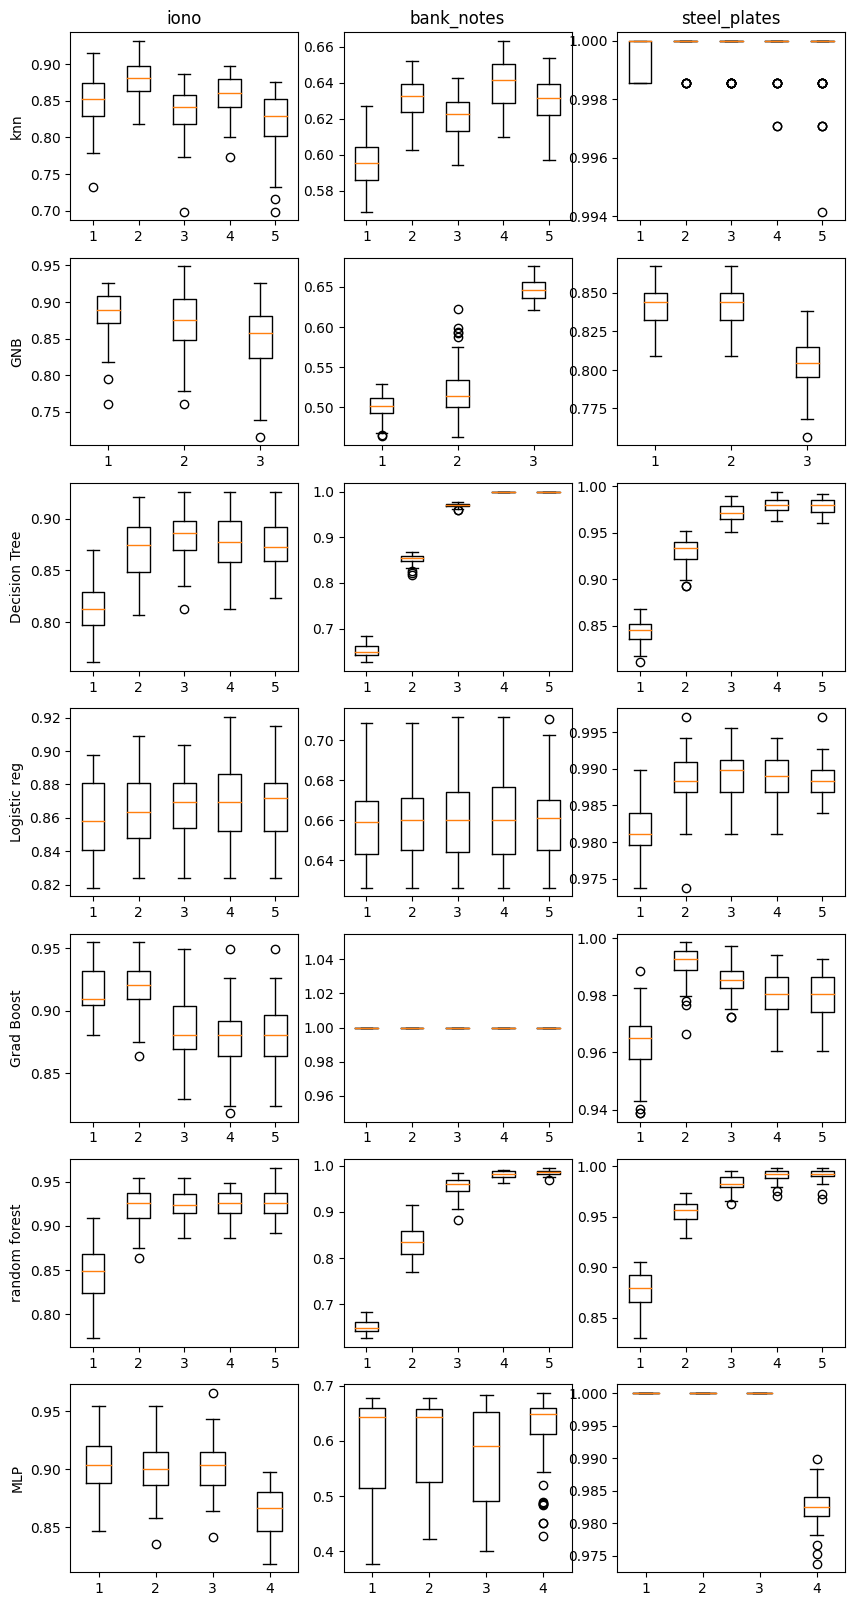

         iono                steel                bank
knn - 0.09886363636363638, 0.3522142121524202, 0.0
gnb - 0.06628787878787878, 0.39100583590799864, 0.14237123420796893
DT - 0.08636363636363638, 0.09433573635427397, 0.04110787172011661
Log Reg - 0.09090909090909091, 0.28980432543769313, 0.005247813411078717
GB - 0.04886363636363635, 0.0, 0.005830903790087461
RF - 0.05340909090909089, 0.08609680741503607, 0.025655976676384862
MLP - 0.056818181818181795, 0.318486096807415, 0.002551020408163268
[0.15035928283868552, 0.19988831630128212, 0.07393574814600899, 0.1286537432526209, 0.018231513384574603, 0.05505395833350394, 0.12595176634458669]


In [131]:
figure, axis = pyplot.subplots(7, 3, figsize = (10,20))
axis[0][0].set_title('Blobs')
axis[0][1].set_title('Classification')
axis[0][2].set_title('Circles')

titles = ['k-means', 'aff prop', 'DBSCAN', 'GMM', 'BIRCH', 'agglo', 'mean shift']

for i in range (0,7):
    axis[i][0].set_ylabel(titles[i])


for index, plot in enumerate(graph_list):
    x_index = index%3
    pyplot.subplot(7, 3, index + 1).scatter(x_list[x_index][:, 0], x_list[x_index][:, 1], c = y_list[index], s = 30, cmap = plt.cm.Paired)
pyplot.show()
pyplot.close()

# ==============================================================================
    # DISPLAYING PART 1 
# ==============================================================================
figure, axis = pyplot.subplots(7, 3, figsize = (10,20))
axis[0][0].set_title('iono')
axis[0][1].set_title('bank_notes')
axis[0][2].set_title('steel_plates')

titles = ['knn', 'GNB', 'Decision Tree', 'Logistic reg', 'Grad Boost', 'random forest', 'MLP']

for i in range (0,7):
    axis[i][0].set_ylabel(titles[i])

for index, plot in enumerate(resres):
    x_index = index%3
    pyplot.subplot(7, 3, index + 1).boxplot(resres[index])
pyplot.show()

errlist = [knn_mean_err, GNB_mean_err, DT_mean_err, logreg_mean_err, GB_mean_err, RF_mean_err, MLP_mean_err]
avglist = []

for i in errlist:
    sum = 0
    for val in i:
        sum += val
    avglist.append(sum/len(i))


knnstr = 'knn - ' + ', '.join(map(str, knn_mean_err)) 
gnbstr = 'gnb - ' + ', '.join(map(str, GNB_mean_err)) 
dtstr = 'DT - ' + ', '.join(map(str, DT_mean_err)) 
logregstr = 'Log Reg - ' + ', '.join(map(str, logreg_mean_err)) 
gbstr = 'GB - ' + ', '.join(map(str, GB_mean_err)) 
rfstr = 'RF - ' + ', '.join(map(str, RF_mean_err)) 
mlpstr = 'MLP - ' + ', '.join(map(str, MLP_mean_err)) 

print('         iono                steel                bank')
print(knnstr)
print(gnbstr)
print(dtstr)
print(logregstr)
print(gbstr)
print(rfstr)
print(mlpstr)
print(avglist)

